<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Jaringan Saraf Tiruan
<center><br><font size="5"><font face="calibri"><strong>Untuk Mendeteksi Penipuan Kartu Kredit Algoritma Backpropagation
<br><br>
<br><strong>Oleh :
<br>
<br><strong>NUZULA RAHMA SAFITRI
<br><strong>09011281722083
<br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

In [1]:
#memanggil library yang akan digunakan
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt #membuat plot
from sklearn.model_selection import train_test_split #membagikan data
from keras.optimizers import Adam
from keras.models import Sequential #library untuk model lapisan bertumpuk
from keras.layers import Dense, Dropout #untuk menambahkan layer
from keras.activations import relu
import pandas as pd #mengelolah data
import numpy as np #untuk komputasi array
import sklearn
import keras #modul yang menyediakan arsitektur berbagai model Dee Learning
import seaborn as sns
from keras.layers import Dense, Dropout, MaxPooling1D
%matplotlib inline

Using TensorFlow backend.


<div class="alert alert-success">
 <font size="3"><p align="justify">
    <strong>Berikut adalah daftar Modul yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    <strong>Numpy =</strong> Modul ini berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks
</li> 
</ul>

<ul>
<li style="text-align: left;">
<strong>Pandas =</strong> Modul ini akan digunakan untuk Load Dataset, karena pandas lebih baik untuk load data dengan skala besar
</li>
</ul>
  
<ul>
<li style="text-align: left;">
<strong>Matplotlib =</strong> Modul ini digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix, grafik akurasi, dll.
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Seaborn =</strong> Modul ini digunakan untuk plot grafik distribusi nilai dari Class (output), modul ini berbasis matplotlib.
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Sklearn =</strong> Modul ini adalah salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti preprocessing, dan lainnya
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Keras =</strong> Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network
</li>
</ul>


<div>

In [2]:
credit = pd.read_csv("creditcard.csv")

## IMPORT DATASET
<div class="alert alert-success">
 <font size="3"><p align="justify">Code di atas digunakan untuk load dataset dengan nama "Creditcard.csv" 

In [3]:
credit.head() #untuk melihat data sebanyak n pada kolom awal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<div class="alert alert-success">
 <font size="3"><p align="justify"><strong>Berikut adalah spesifikasi dataset yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    Input terdiri dari 30 variabel dengan berbagai indikator yang sesuai dengan permasalahan yang akan di bahas
</li> 
</ul>

<ul>
<li style="text-align: left;">
Output terdiri dari 1 variabel (Class), dengan 2 kondisi, yaitu 0 dan 1
</li>
</ul>
    
<div>

In [4]:
#berfungsi untuk menunjukkan rangkuman statistik seperti rata-rata. median, dan lain sebagainnya pada kolom
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<div class="alert alert-success">
 <font size="3"><p align="justify">Pada code di atas terlihat bahwa datasetnya sesuai dengan spesifikasi yang disebutkan sebelumnya

In [5]:
no_fraud = credit[credit.Class==0]
fraud = credit[credit.Class==1]

<div class="alert alert-success">
 <font size="3"><p align="justify">Pada ANN ini terdapat 2 output : 
<ul>
<li style="text-align: left;">
    no_fraud = kondisi saat ANN menetapkan bahwa tidak ada penipuan kartu kredit, nilai yang di ambil adalah pada Variabel "Class" dengan nilai 0 yang ada pada dataset
</li> 
</ul>

<ul>
<li style="text-align: left;">
fraud = kondisi saat ANN menetapkan bahwa ada penipuan kartu kredit, nilai yang di ambil adalah pada Variabel "Class" dengan nilai 1 yang ada pada dataset</h4>
</li>
</ul>
    
<div>

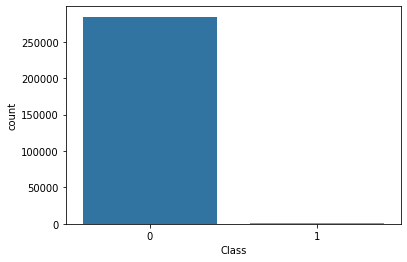

In [6]:
sns.countplot(x=credit['Class'])

In [7]:
from sklearn.utils import resample
fraud_upsample = resample(fraud, replace=True,n_samples=250000,random_state=123)
credit_resampled = pd.concat([no_fraud, fraud_upsample])

<div class="alert alert-success">
 <font size="3"><p align="justify">Pada code di atas, fraud di tambah datanya. Resample ini digunakan karena data yang unbalanced, maksudnya output 0 dan Output 1 jumlahnya terlalu ekstrim sehingga datanya menjadi tidak seimbang seperti yang terlihat pada grafik di atas

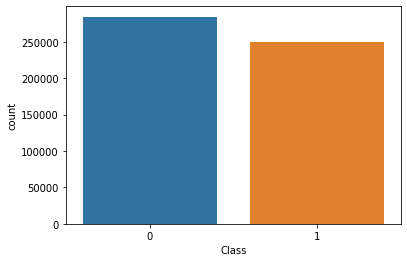

In [8]:
sns.countplot(x=credit_resampled['Class'],data=credit)

<div class="alert alert-success">
 <font size="3"><p align="justify">Pada grafik di atas menunjukkan antara data class 1 dan 0 sudah cukup seimbang dibandingkan data yang sebelumnya sehingga data ini akan lebih mudah untuk di proses

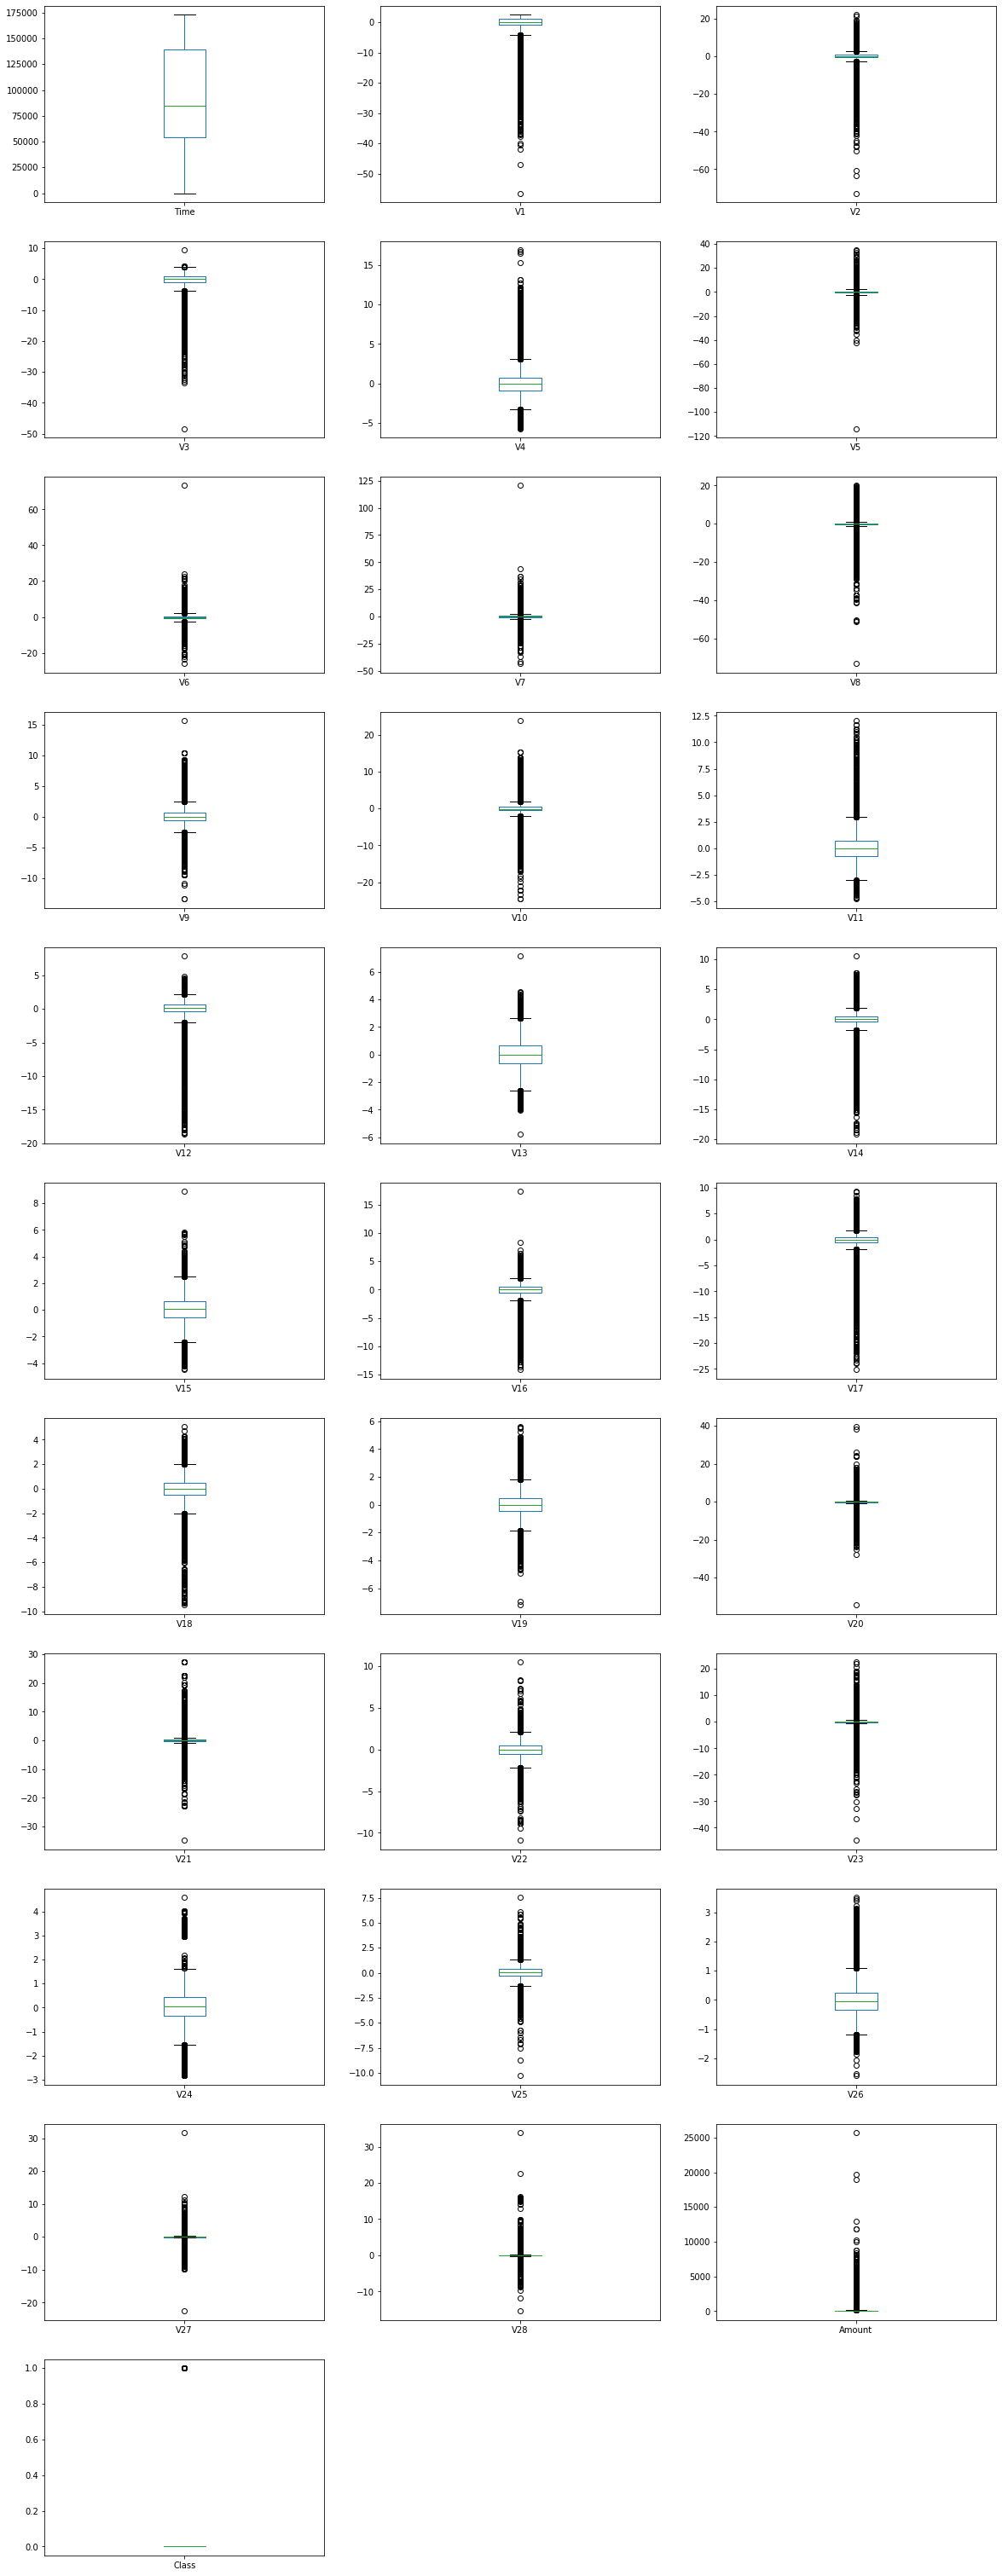

In [9]:
credit.plot(kind='box', subplots=True, layout=(11,3), sharex=False, sharey=False, figsize=(20,55))
plt.show()

<div class="alert alert-success">
 <font size="3"><p align="justify">Grafik di atas menunjukkan Distribusi data pada setiap variabel yang ada pada dataset

C:\Users\HP\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\HP\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


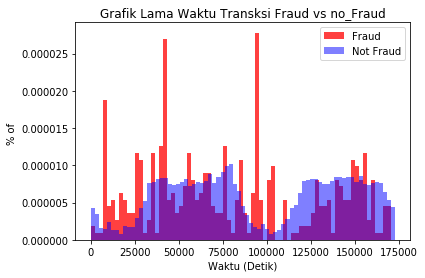

In [10]:
bins = 75
plt.hist(credit.Time[credit.Class == 1], bins = bins, normed = True, alpha = 0.75, label = 'Fraud', color = 'red')
plt.hist(credit.Time[credit.Class == 0], bins = bins, normed = True, alpha = 0.5, label = 'Not Fraud', color = 'blue')
plt.legend(loc='upper right')
plt.xlabel('Waktu (Detik)')
plt.ylabel('% of ')
plt.title('Grafik Lama Waktu Transksi Fraud vs no_Fraud')
plt.show()

<div class="alert alert-success">
 <font size="3"><p align="justify">Grafik ini menampilkan pola waktu transaksi untuk event "Fraud" dan event "no_Fraud"

In [11]:
X = credit_resampled.drop(['Class'],axis=1)
y = credit_resampled["Class"]

In [12]:
from sklearn.model_selection import train_test_split

<div class="alert alert-success">
 <font size="3"><p align="justify">Modul ini akan digunakan untuk memisahkan data training dan testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<div class="alert alert-success">
 <font size="3"><p align="justify">Pendeklarasian Variabel dengan ketentuan sebagai berikut : 

<ul>
<li style="text-align: left;">
X_train = Ini adalah variabel yang akan digunakan untuk data training X
</li>
</ul>

<ul>
<li style="text-align: left;">
X_test = Ini adalah variabel yang akan digunakan untuk data testing X
</li>
</ul>

<ul>
<li style="text-align: left;">
y_train =Ini adalah variabel yang akan digunakan untuk data training Y
</li>
</ul>

<ul>
<li style="text-align: left;">
y_test = ini adalah variabel yang akan digunakan untuk data testing Y
</li>
</ul>

Pada codingan di atas, saya menggunakan modul train_test_split untuk membagi data yang akan digunakan untuk testing dan training, data untuk testing sebesar 30%, dan data untuk training sebesar 70%.
<div>

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
X_train_scaled = sc.fit_transform(X_train)

In [16]:
X_train_scaled.shape

(374020, 30)

In [17]:
X_test_scaled = sc.transform(X_test)

In [18]:
X_test_scaled.shape

(160295, 30)

In [19]:
neuron = Sequential()

In [21]:
neuron.add(Dense(30,activation='relu'))
neuron.add(Dropout(0.2))

<div class="alert alert-success">
 <font size="3"><strong><p align="justify">Codingan di atas adalah Layer Kedua dari Neural Network yang saya buat</strong>
<ul>
<li style="text-align: left;">
    Dense 30 = Model Neural Network yang saya buat pada layer pertama ini terdiri dari 30 neuron
</li> 
</ul>

<ul>
<li style="text-align: left;">
Rectified Linear Unit (ReLU) = Merupakan fungsi aktivasi linear yang digunakan pada layer ini
</li>
</ul>
    
<ul>
<li style="text-align: left;">
Dropout 0.2 = Dropout ini berfungsi untuk membuang neuron berlebih jika terjadi kelebihan neuron pada layer ini
</li>
</ul>

<div>

In [22]:
neuron.add(Dense(1,activation='sigmoid'))

<div class="alert alert-success">
 <font size="3">Code di atas adalah Layer Output/Terakhir dari Neural Network ini
<ul>
<li style="text-align: left;">
Dense 1 = Neural Network yang saya buat pada layer terakhir ini terdiri dari 1 neuron, neuron inilah yang akan menghasilkan output berdasarkan dataset yang ada dan memprediksi apakah terdapat penipuan kartu kredit atau tidak
</li> 
</ul>

<ul>
<li style="text-align: left;">
Sigmoid = Merupakan fungsi aktivasi yang digunakan pada layer ini, fungsi aktivasi sigmoid memberikan output dengan rentan nilai anatara 0 s/d 1
</li>
</ul>
    
<div>

In [23]:
neuron.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 6,161
Trainable params: 6,161
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-success">
 <font size="3">Params atau Parameter adalah total neuron yang akan dipakai pada program ini sesuai dengan Model neuron yang dibuat sebelumnya

In [24]:
neuron.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<div class="alert alert-success">
 <font size="3">Adam = Adam adalah optimizer yang digunakan untuk memperbarui bobot jaringan berdasarkan data pelatihan
  <br> Binary Crossentropy = Binary Cross ini berfungsi untuk mengukur kinerja model klasifikasi yang outputnya adalah nilai probabilitas antara 0 dan 1

In [25]:
history = neuron.fit(X_train_scaled, y_train, epochs=25, batch_size=20,validation_split=0.3)

Train on 261813 samples, validate on 112207 samples
Epoch 1/25
261813/261813 [==============================] - 796s 3ms/step - loss: 0.0555 - acc: 0.9804 - val_loss: 0.0137 - val_acc: 0.9965
Epoch 2/25
261813/261813 [==============================] - 554s 2ms/step - loss: 0.0186 - acc: 0.9945 - val_loss: 0.0079 - val_acc: 0.9981
Epoch 3/25
261813/261813 [==============================] - 268s 1ms/step - loss: 0.0128 - acc: 0.9965 - val_loss: 0.0052 - val_acc: 0.9989
Epoch 4/25
261813/261813 [==============================] - 512s 2ms/step - loss: 0.0108 - acc: 0.9972 - val_loss: 0.0062 - val_acc: 0.9983
Epoch 5/25
261813/261813 [==============================] - 346s 1ms/step - loss: 0.0101 - acc: 0.9974 - val_loss: 0.0049 - val_acc: 0.9991
Epoch 6/25
261813/261813 [==============================] - 240s 915us/step - loss: 0.0089 - acc: 0.9978 - val_loss: 0.0050 - val_acc: 0.9990
Epoch 7/25
261813/261813 [==============================] - 241s 919us/step - loss: 0.0086 - acc: 0.9979 -

C:\Users\HP\Anaconda3\envs\tensorflow-sessions\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101741). Check your callbacks.
  % delta_t_median)


261813/261813 [==============================] - 1087s 4ms/step - loss: 0.0063 - acc: 0.9987 - val_loss: 0.0037 - val_acc: 0.9996
Epoch 20/25
 73100/261813 [=======>......................] - ETA: 12:09 - loss: 0.0069 - acc: 0.9988

C:\Users\HP\Anaconda3\envs\tensorflow-sessions\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141292). Check your callbacks.
  % delta_t_median)


261813/261813 [==============================] - 1244s 5ms/step - loss: 0.0060 - acc: 0.9989 - val_loss: 0.0031 - val_acc: 0.9997
Epoch 21/25
261813/261813 [==============================] - 489s 2ms/step - loss: 0.0060 - acc: 0.9989 - val_loss: 0.0034 - val_acc: 0.9995
Epoch 22/25
261813/261813 [==============================] - 775s 3ms/step - loss: 0.0054 - acc: 0.9990 - val_loss: 0.0038 - val_acc: 0.9995
Epoch 23/25
150200/261813 [================>.............] - ETA: 2:43 - loss: 0.0064 - acc: 0.9988

C:\Users\HP\Anaconda3\envs\tensorflow-sessions\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234368). Check your callbacks.
  % delta_t_median)


261813/261813 [==============================] - 859s 3ms/step - loss: 0.0060 - acc: 0.9989 - val_loss: 0.0027 - val_acc: 0.9997
Epoch 24/25
261813/261813 [==============================] - 290s 1ms/step - loss: 0.0062 - acc: 0.9989 - val_loss: 0.0030 - val_acc: 0.9996
Epoch 25/25
261813/261813 [==============================] - 283s 1ms/step - loss: 0.0059 - acc: 0.9990 - val_loss: 0.0031 - val_acc: 0.9997


<div class="alert alert-success">
 <font size="3">Epoch = adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation)
    <br>Batch Size 25 = adalah jumlah sampel data yang disebarkan ke Neural Network. Jadi dataset akan dibagi menjadi 25 bagian untuk memudahkan index pada saat pelatihan.
    <br>Validation SPlit 0.3 = Adalah ukuran data yang akan digunakan untuk testing dan training, data training sebesar 0,7 atau 70%, dan data testing sebesar 0,3 atau 30%.

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

<div class="alert alert-success"><strong>TRAINING AND TESTING ACCURACY</strong>

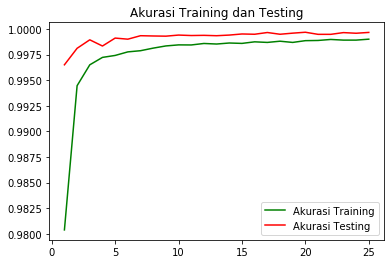

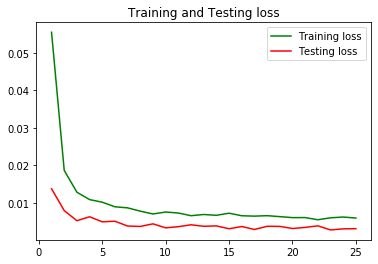

In [27]:
plt.plot(epochs, acc, 'b',color='green', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b',color='red', label='Akurasi Testing')
plt.title('Akurasi Training dan Testing')
plt.legend()
plt.show()
plt.plot(epochs, loss, 'b',color='green', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='red', label='Testing loss')
plt.title('Training and Testing loss')
plt.legend()
plt.show()

In [28]:
skor = neuron.evaluate(X_test_scaled,y_test)
print("\n%s: %.2f%%" % ("Skor Akurasi Menggunakan Evaluate ", skor[1]*100))

160295/160295 [==============================] - 25s 155us/step

Skor Akurasi Menggunakan Evaluate : 99.95%


In [29]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Tabel Confusion Matrix')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [30]:
y = neuron.predict(X_test_scaled)
y = (y > 0.5)

Tabel Confusion Matrix


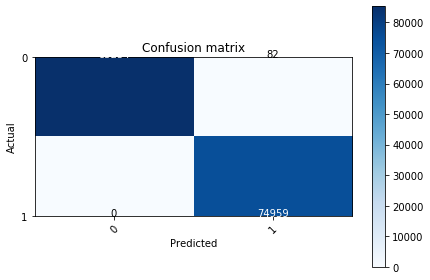

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y)
plot_confusion_matrix(cm, classes = range(2))
plt.show()

In [32]:
ac = ((85272+74959)/(85272+74959+64+0))
print("\n%s: %.2f%%" % ("Skor Akurasi ", ac*100))


Skor Akurasi : 99.96%


<div class="alert alert-success"><strong>ACCURACY</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai akurasinya adalah seperti diatas :

In [33]:
prec = 74959 / (64 + 74959)
print("\n%s: %.2f%%" % ("Skor Presisi ", prec*100))


Skor Presisi : 99.91%


<div class="alert alert-success"><strong>PRECISSION</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai presisinya adalah seperti diatas :

In [34]:
rec = 74959 / (0+74959)
print("\n%s: %.2f%%" % ("Skor Recall ", rec*100))


Skor Recall : 100.00%


<div class="alert alert-success"><strong>RECALL</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai recallnya adalah sebaga :

In [35]:
TNR = 64 / (85272 + 64)
print("Skor True Negative Rate ", TNR)

Skor True Negative Rate  0.0007499765632323989
